In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = load_svmlight_file("australian_scale.txt")
X_train, X_vali, y_train, y_vali = train_test_split(data[0].todense(), data[1], test_size=0.25, random_state=42)

In [3]:
X_train = np.c_[X_train, np.ones(X_train.shape[0])]
X_vali = np.c_[X_vali, np.ones(X_vali.shape[0])]
eta = 0.0005
C = 1
iter = 500
dimension = X_train.shape[1]  
w = np.random.normal(size = (dimension))   #正态分布初始化
G = np.zeros(dimension)   

In [4]:
def SVM (X_train, y_train, X_vali, y_vali, w):
    train_loss = np.zeros(iter)          
    validation_loss = np.zeros(iter)      
    for i in range(iter):       
        hinge_loss_train = hinge_loss_f(X_train, y_train, w)                                    
        train_loss[i] = np.dot(w, w.reshape(dimension, 1)) / 2 + C * hinge_loss_train            
        hinge_loss_validation = hinge_loss_f(X_vali, y_vali, w)                                  
        validation_loss[i] = np.dot(w, w.reshape(dimension, 1)) / 2 + C * hinge_loss_validation   
        #gradient descent
        G = derivative(X_train, y_train, w)         
        w = w - eta * G                           
    return train_loss,validation_loss       

In [5]:
def hinge_loss_f (X, y, w):
    loss = 0
    hit = 0
    for i in range(X.shape[0]):
        judge = y[i] * np.dot(X[i], w.reshape(X.shape[1], 1))
        if (judge >= 1):
            loss = loss + 0
        else:
            loss = loss + 1 - judge
        if (judge > 0):
            hit = hit + 1
        else:
            hit = hit + 0
    loss = loss / X.shape[0]
    hit_rate = hit / X.shape[0]
    return loss

In [6]:
def derivative (X, y, w):
    g = np.zeros(X.shape[1])
    for i in range(X.shape[0]):
        judge = y[i] * np.dot(X[i], w.reshape(X.shape[1], 1))
        if (judge < 1):
            g = g - y[i] * X[i]
    G = w + C * g
    return G

In [7]:
L_train, L_validation = SVM(X_train, y_train, X_vali, y_vali, w)

Text(0,0.5,'Loss')

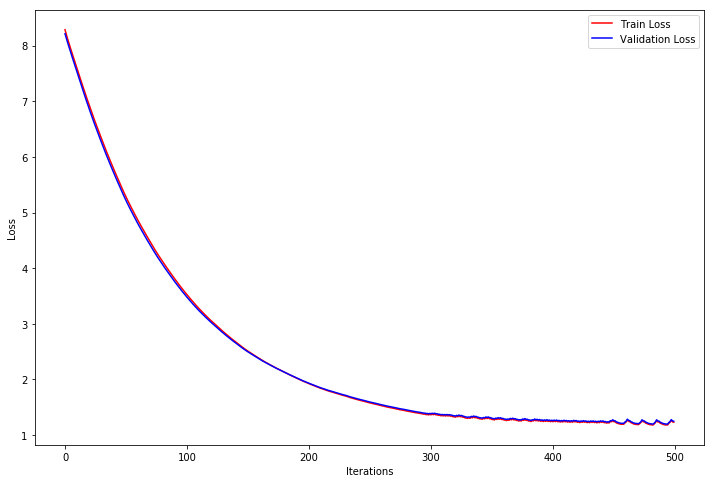

In [8]:
x = np.arange(iter)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, L_train.tolist(), 'r', label = 'Train Loss')
ax.plot(x, L_validation.tolist(), 'b', label = 'Validation Loss')
ax.legend()  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Loss')  